### Importing needed libraries

In [1]:
# import GetOldTweets3 as got
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime as dt

%matplotlib inline
import matplotlib.pyplot as plt 
# from IPython.display import display_pretty, display_html

With the Module GetOldTweets3, one can import all tweet history from a given account.
I am importing all of ELon Musk's tweets over the 2010 decade.
Tesla went public in 2010 (Initial public offering (IPO) launched on January, 29th, 2010), therefore I am importing all of Musk's tweets on the same time period.

### Creating Functions

In [2]:
def adding_tweet_interactions(df_tweets):
    df_tweets['tweet_interactions'] = df_tweets['retweets'] + df_tweets['replies'] + df_tweets['favorites']
    return df_tweets

In [3]:
def groupby_adding_tweet_interactions(df_tweets):
    """ Grouping By raw dataframe by days & adding a new column tweet_interactions summing up retweets & replies
    
    Input : raw dataframe
    Output : Dataframe with added column
    
    """
    df_groupby = df_tweets.groupby('date').agg({'text':'count', 'retweets':'sum', 'replies':'sum', 'favorites':'sum'})
    df_groupby['tweet_interactions'] = df_groupby['retweets'] + df_groupby['replies'] + df_groupby['favorites']
    
    return df_groupby

#### Importing raw CSV of Elon Musk's tweets from 2010 onwards

In [4]:
df_musk_tweets_raw = pd.read_csv('..\DataSets\Twitter_data\df_musk_tweets.csv', index_col='Unnamed: 0')

In [5]:
df_musk_tweets_raw

,username,to,text,retweets,favorites,replies,id,permalink,author_id,date,formatted_date,hashtags,mentions,geo,urls
0,elonmusk,Universe_SkyArt,I just sent a note to Twitter to clarify that ...,319,4331,238,1233516620028530688,https://twitter.com/elonmusk/status/1233516620...,44196397,2020-02-28 22:17:34+00:00,Fri Feb 28 22:17:34 +0000 2020,NaN,NaN,NaN,NaN
1,elonmusk,LeeHudson_,The competitor should be a drone fighter plane...,359,5104,477,1233478599170195457,https://twitter.com/elonmusk/status/1233478599...,44196397,2020-02-28 19:46:29+00:00,Fri Feb 28 19:46:29 +0000 2020,NaN,NaN,NaN,NaN
2,elonmusk,Teslarati,It’s not that big really,355,11029,536,1233153286015868928,https://twitter.com/elonmusk/status/1233153286...,44196397,2020-02-27 22:13:48+00:00,Thu Feb 27 22:13:48 +0000 2020,NaN,NaN,NaN,NaN
3,elonmusk,SpaceX,Testing Raptor in vertical configuration (on t...,419,9764,265,1233115872698351621,https://twitter.com/elonmusk/status/1233115872...,44196397,2020-02-27 19:45:08+00:00,Thu Feb 27 19:45:08 +0000 2020,NaN,NaN,NaN,NaN
4,elonmusk,newscientist,It’s not mine,2122,36510,719,1232748533486276608,https://twitter.com/elonmusk/status/1232748533...,44196397,2020-02-26 19:25:28+00:00,Wed Feb 26 19:25:28 +0000 2020,NaN,NaN,NaN,NaN
5,elonmusk,Foxfire40900590,Definitely! What’s in that sky city thing!? Ne...,300,5191,144,1232737675364274176,https://twitter.com/elonmusk/status/1232737675...,44196397,2020-02-26 18:42:19+00:00,Wed Feb 26 18:42:19 +0000 2020,NaN,NaN,NaN,NaN
6,elonmusk,Erdayastronaut,Sure,108,3697,130,1232717030370856960,https://twitter.com/elonmusk/status/1232717030...,44196397,2020-02-26 17:20:17+00:00,Wed Feb 26 17:20:17 +0000 2020,NaN,NaN,NaN,NaN
7,elonmusk,JaneidyEve,Posting SpaceX videos is definitely not copyri...,229,3174,101,1232709990642675712,https://twitter.com/elonmusk/status/1232709990...,44196397,2020-02-26 16:52:19+00:00,Wed Feb 26 16:52:19 +0000 2020,NaN,NaN,NaN,NaN
8,elonmusk,j_brorsson,"Hopefully, in March. Checking …",84,1970,80,1232566868541505536,https://twitter.com/elonmusk/status/1232566868...,44196397,2020-02-26 07:23:36+00:00,Wed Feb 26 07:23:36 +0000 2020,NaN,NaN,NaN,NaN
9,elonmusk,Teslarati,I had no idea this existed. Sounds awesome tho...,247,6946,174,1232566420006821888,https://twitter.com/elonmusk/status/1232566420...,44196397,2020-02-26 07:21:49+00:00,Wed Feb 26 07:21:49 +0000 2020,NaN,NaN,NaN,NaN


In [6]:
adding_tweet_interactions(df_musk_tweets_raw)

,username,to,text,retweets,favorites,replies,id,permalink,author_id,date,formatted_date,hashtags,mentions,geo,urls,tweet_interactions
0,elonmusk,Universe_SkyArt,I just sent a note to Twitter to clarify that ...,319,4331,238,1233516620028530688,https://twitter.com/elonmusk/status/1233516620...,44196397,2020-02-28 22:17:34+00:00,Fri Feb 28 22:17:34 +0000 2020,NaN,NaN,NaN,NaN,4888
1,elonmusk,LeeHudson_,The competitor should be a drone fighter plane...,359,5104,477,1233478599170195457,https://twitter.com/elonmusk/status/1233478599...,44196397,2020-02-28 19:46:29+00:00,Fri Feb 28 19:46:29 +0000 2020,NaN,NaN,NaN,NaN,5940
2,elonmusk,Teslarati,It’s not that big really,355,11029,536,1233153286015868928,https://twitter.com/elonmusk/status/1233153286...,44196397,2020-02-27 22:13:48+00:00,Thu Feb 27 22:13:48 +0000 2020,NaN,NaN,NaN,NaN,11920
3,elonmusk,SpaceX,Testing Raptor in vertical configuration (on t...,419,9764,265,1233115872698351621,https://twitter.com/elonmusk/status/1233115872...,44196397,2020-02-27 19:45:08+00:00,Thu Feb 27 19:45:08 +0000 2020,NaN,NaN,NaN,NaN,10448
4,elonmusk,newscientist,It’s not mine,2122,36510,719,1232748533486276608,https://twitter.com/elonmusk/status/1232748533...,44196397,2020-02-26 19:25:28+00:00,Wed Feb 26 19:25:28 +0000 2020,NaN,NaN,NaN,NaN,39351
5,elonmusk,Foxfire40900590,Definitely! What’s in that sky city thing!? Ne...,300,5191,144,1232737675364274176,https://twitter.com/elonmusk/status/1232737675...,44196397,2020-02-26 18:42:19+00:00,Wed Feb 26 18:42:19 +0000 2020,NaN,NaN,NaN,NaN,5635
6,elonmusk,Erdayastronaut,Sure,108,3697,130,1232717030370856960,https://twitter.com/elonmusk/status/1232717030...,44196397,2020-02-26 17:20:17+00:00,Wed Feb 26 17:20:17 +0000 2020,NaN,NaN,NaN,NaN,3935
7,elonmusk,JaneidyEve,Posting SpaceX videos is definitely not copyri...,229,3174,101,1232709990642675712,https://twitter.com/elonmusk/status/1232709990...,44196397,2020-02-26 16:52:19+00:00,Wed Feb 26 16:52:19 +0000 2020,NaN,NaN,NaN,NaN,3504
8,elonmusk,j_brorsson,"Hopefully, in March. Checking …",84,1970,80,1232566868541505536,https://twitter.com/elonmusk/status/1232566868...,44196397,2020-02-26 07:23:36+00:00,Wed Feb 26 07:23:36 +0000 2020,NaN,NaN,NaN,NaN,2134
9,elonmusk,Teslarati,I had no idea this existed. Sounds awesome tho...,247,6946,174,1232566420006821888,https://twitter.com/elonmusk/status/1232566420...,44196397,2020-02-26 07:21:49+00:00,Wed Feb 26 07:21:49 +0000 2020,NaN,NaN,NaN,NaN,7367


### Data Wrangling

Cleaning the dataset to only keep relevant data :
droping useless columns :
- 'Username' : by definition only Elon Musk's tweets
- 'id' : author's Twitter id - same concept, all Musk's publications
- 'formatted_date' : double usage with 'date' column
- 'geo' : empty contents
- 'urls' : URLs included in tweets, too many NaN & not relevant information

In [7]:
df_musk_tweets_raw.isnull().sum()

username                 0
to                    2619
text                    81
retweets                 0
favorites                0
replies                  0
id                       0
permalink                0
author_id                0
date                     0
formatted_date           0
hashtags              8755
mentions              7999
geo                   8797
urls                  7590
tweet_interactions       0
dtype: int64

In [8]:
df_musk_tweets_raw.drop(columns=[ 'username', 'formatted_date','id', 'geo', 'urls', 'author_id'], inplace=True)

Modifying datatypes of columns :
droping useless columns :
- 'date' to datetime

In [9]:
df_musk_tweets_raw['date'] =  pd.to_datetime(df_musk_tweets_raw['date'])
df_musk_tweets_raw['date'] = df_musk_tweets_raw['date'].dt.date

Reorganizing columns to more practical order

In [10]:
df_musk_tweets_raw = df_musk_tweets_raw[['date', 'text', 'retweets','replies','favorites','tweet_interactions','permalink', 'to', 'hashtags', 'mentions']]

In [11]:
df_musk_tweets_raw.dtypes

date                  object
text                  object
retweets               int64
replies                int64
favorites              int64
tweet_interactions     int64
permalink             object
to                    object
hashtags              object
mentions              object
dtype: object

In [21]:
df_musk_tweets_raw

,date,text,retweets,replies,favorites,tweet_interactions,permalink,to,hashtags,mentions
0,2020-02-28,I just sent a note to Twitter to clarify that ...,319,238,4331,4888,https://twitter.com/elonmusk/status/1233516620...,Universe_SkyArt,NaN,NaN
1,2020-02-28,The competitor should be a drone fighter plane...,359,477,5104,5940,https://twitter.com/elonmusk/status/1233478599...,LeeHudson_,NaN,NaN
2,2020-02-27,It’s not that big really,355,536,11029,11920,https://twitter.com/elonmusk/status/1233153286...,Teslarati,NaN,NaN
3,2020-02-27,Testing Raptor in vertical configuration (on t...,419,265,9764,10448,https://twitter.com/elonmusk/status/1233115872...,SpaceX,NaN,NaN
4,2020-02-26,It’s not mine,2122,719,36510,39351,https://twitter.com/elonmusk/status/1232748533...,newscientist,NaN,NaN
5,2020-02-26,Definitely! What’s in that sky city thing!? Ne...,300,144,5191,5635,https://twitter.com/elonmusk/status/1232737675...,Foxfire40900590,NaN,NaN
6,2020-02-26,Sure,108,130,3697,3935,https://twitter.com/elonmusk/status/1232717030...,Erdayastronaut,NaN,NaN
7,2020-02-26,Posting SpaceX videos is definitely not copyri...,229,101,3174,3504,https://twitter.com/elonmusk/status/1232709990...,JaneidyEve,NaN,NaN
8,2020-02-26,"Hopefully, in March. Checking …",84,80,1970,2134,https://twitter.com/elonmusk/status/1232566868...,j_brorsson,NaN,NaN
9,2020-02-26,I had no idea this existed. Sounds awesome tho...,247,174,6946,7367,https://twitter.com/elonmusk/status/1232566420...,Teslarati,NaN,NaN


Grouping By

In [13]:
df_musk_general_tweets_groupby = groupby_adding_tweet_interactions(df_musk_tweets_raw)

df_musk_general_tweets_groupby

,text,retweets,replies,favorites,tweet_interactions
date,,,,,
2010-06-04,1,121,37,407,565
2011-12-01,2,26,24,190,240
2011-12-03,2,29,2,34,65
2011-12-04,1,9,7,24,40
2011-12-21,7,637,36,1326,1999
2011-12-22,3,195,98,1122,1415
2011-12-24,3,3267,72,8188,11527
2011-12-26,6,185,40,537,762
2011-12-27,1,34,4,29,67


In [14]:
df_musk_general_tweets_groupby.to_csv('../DataSets/Twitter_data/df_musk_general_tweets_groupby.csv')

#### Checking Tweets mentioning Tesla products

Tesla has a vast range of products, with its number increasing over the years through new product launchs.
Therefore a list of products is created to isolate specific tweets mentioning one of those products and/or special events.

The following items have been queried: 
- all Tesla car Models i.e Model S, Model X, Model 3, Model Y, Roadster, Cybertruck (pickup), Semi (truck)
- Tesla electric products : PowerWall (House battery), SolarRoof (roof tile solar panels), SuperCharger (refuel electric stations)
- Gigafactory : special Tesla factory and battery/batteries related posts
- special events : StarMan space trip through SpaceX rocket launch
- Tesla stock related posts : SEC i.e. "Securities and Exchange Commission" with whom Musk had several quarrels

In [22]:
df_musk_Tesla_tweets = df_musk_tweets_raw[df_musk_tweets_raw['text'].str.contains(pat="Tesla|TSLA|tesla|TESLA|@Tesla|model3|modelX|'Model X'|modelS|'Model S'|modelY|'Model Y'|\
                    Roadster|pickup|Pickup|Cybrtrk|cybertruck|Cybertruck|Semi|semi|powerwall|PowerWall|'Solar Roof'|SolarRoof|Solar|solar|\
                    starman|Starman|'car in deep space'|'car in orbit'|'Currently over Australia'\
                    SolarCity|solarpanels|Solarglass|supercharger|Supercharger|battery|batteries\
                    SEC|'Short-sellers'|'Shortseller Enrichment Commission'|Gigafactory") == True]

In [23]:
df_musk_Tesla_tweets

,date,text,retweets,replies,favorites,tweet_interactions,permalink,to,hashtags,mentions
23,2020-02-25,Teslas in a tunnel. Happening in Vegas rn.,161,125,2749,3035,https://twitter.com/elonmusk/status/1232219164...,cleantechnica,NaN,NaN
27,2020-02-22,Getting there was super hard. Very proud of Te...,568,615,20926,22109,https://twitter.com/elonmusk/status/1231332796...,NaN,NaN,NaN
32,2020-02-21,"Btw, in some prior tweets I’d said production ...",236,324,4287,4847,https://twitter.com/elonmusk/status/1230959056...,elonmusk,NaN,NaN
64,2020-02-17,All orgs developing advanced AI should be regu...,265,109,1904,2278,https://twitter.com/elonmusk/status/1229546793...,elonmusk,NaN,NaN
69,2020-02-16,Tesla is ramping up Solar Roof installation ac...,5362,1976,50923,58261,https://twitter.com/elonmusk/status/1228849721...,NaN,NaN,NaN
82,2020-02-15,Tesla Model S estimated EPA range is now above...,3717,1769,48937,54423,https://twitter.com/elonmusk/status/1228540886...,NaN,NaN,NaN
105,2020-02-10,This is incorrect. No air suspension planned f...,507,380,9586,10473,https://twitter.com/elonmusk/status/1226989747...,Teslarati,NaN,NaN
107,2020-02-10,The degree to which SolarGlass will positively...,1300,628,20384,22312,https://twitter.com/elonmusk/status/1226927146...,NaN,NaN,NaN
108,2020-02-10,Tesla April company talk will be from our Giga...,1949,1016,37323,40288,https://twitter.com/elonmusk/status/1226926073...,NaN,NaN,NaN
109,2020-02-10,Should preface this saying that feedback from ...,316,499,10192,11007,https://twitter.com/elonmusk/status/1226924143...,NaN,NaN,NaN


In [24]:
df_musk_Tesla_tweets.to_csv('../DataSets/Twitter_data/df_musk_Tesla_tweets.csv',index=False)

Out of the 8797 tweets of Elon Musk, 1105 are mentioning one of Tesla products aforementioned

Grouping by Tesla related tweets to measure their specific amount per day from 2010 onwards

Grouping By Tweets by date, in order to measure tweets frequency & their impact:
- text by count
- retweets & replies by suù

In [25]:
df_musk_Tesla_tweets_groupby = groupby_adding_tweet_interactions(df_musk_Tesla_tweets)

df_musk_Tesla_tweets_groupby

,text,retweets,replies,favorites,tweet_interactions
date,,,,,
2011-12-31,1,10,3,10,23
2012-01-11,1,68,28,328,424
2012-01-13,1,51,3,15,69
2012-01-17,3,63,53,38,154
2012-01-24,1,450,11,105,566
2012-01-28,1,110,18,23,151
2012-02-08,1,47,7,59,113
2012-02-10,3,190,46,314,550
2012-02-17,1,29,4,3,36


Exporting Grouped by CSV

In [29]:
df_musk_Tesla_tweets_groupby.to_csv('../DataSets/Twitter_data/df_musk_Tesla_tweets_groupby.csv')

In [30]:
# adding_tweet_interactions(df_musk_Tesla_tweets_groupby)

Exporting Twitter analytics into CSV file

In [28]:
# df_musk_Tesla_tweets_groupby.to_csv('df_musk_Tesla_tweets_groupby.csv', index=False)

#### Getting URL of top 100 tweets in terms of 

In [31]:
top_200_TSLA_tweets_interactions = df_musk_Tesla_tweets.nlargest(n=200, columns='tweet_interactions')

In [32]:
top_200_TSLA_tweets_interactions

,date,text,retweets,replies,favorites,tweet_interactions,permalink,to,hashtags,mentions
679,2019-11-24,Cybertruck pulls F-150 uphill,116793,16494,670614,803901,https://twitter.com/elonmusk/status/1198751258...,NaN,NaN,NaN
720,2019-11-22,Nobody *expects* the Cybertruck,48265,14548,438698,501511,https://twitter.com/elonmusk/status/1197768038...,NaN,NaN,NaN
249,2020-01-29,A friend just sent me this excerpt from a Tesl...,37648,4488,366829,408965,https://twitter.com/elonmusk/status/1222597315...,NaN,NaN,NaN
712,2019-11-23,Franz throws steel ball at Cybertruck window r...,38694,8478,328580,375752,https://twitter.com/elonmusk/status/1198090787...,NaN,NaN,NaN
392,2020-01-07,At Tesla Giga Shanghai NSFW!!,37175,7420,306826,351421,https://twitter.com/elonmusk/status/1214483582...,NaN,NaN,NaN
2412,2019-04-23,"Tesla is going to develop a quiet, electric le...",24939,10392,314387,349718,https://twitter.com/elonmusk/status/1120831425...,NaN,NaN,NaN
704,2019-11-23,"146k Cybertruck orders so far, with 42% choosi...",24714,7734,303872,336320,https://twitter.com/elonmusk/status/1198344195...,NaN,NaN,NaN
3033,2019-02-20,4000 Tesla cars loading in SF for Europe,17929,5107,217917,240953,https://twitter.com/elonmusk/status/1098009983...,NaN,NaN,NaN
2706,2019-03-30,Tesla Semi delivering Tesla cars,16803,3115,203911,223829,https://twitter.com/elonmusk/status/1112106548...,NaN,NaN,NaN
3580,2018-11-29,You can summon your Tesla from your phone. Onl...,26440,3364,183792,213596,https://twitter.com/elonmusk/status/1067967799...,RodneyHansen,NaN,NaN


In [33]:
top_200_TSLA_tweets_interactions.to_csv('../DataSets/Twitter_data/top_200_TSLA_tweets_interactions.csv', index=False)

#### Ploting Tweet data

In [ ]:
df_musk_tweets_raw['date'] = pd.to_datetime(df_musk_tweets_raw['date'])

In [ ]:
df_musk_tweets_raw.plot()

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(20,10))
plt.style.use('fivethirtyeight')
ax[0].plot(tweet_groupby['text'])
ax[0].set_title("amount of Elon Musk's tweets a day")
ax[1].plot(tweet_groupby)
ax[1].set_title("amount of Reactions to Elon Musk's per day")

NameError: name 'tweet_groupby' is not defined

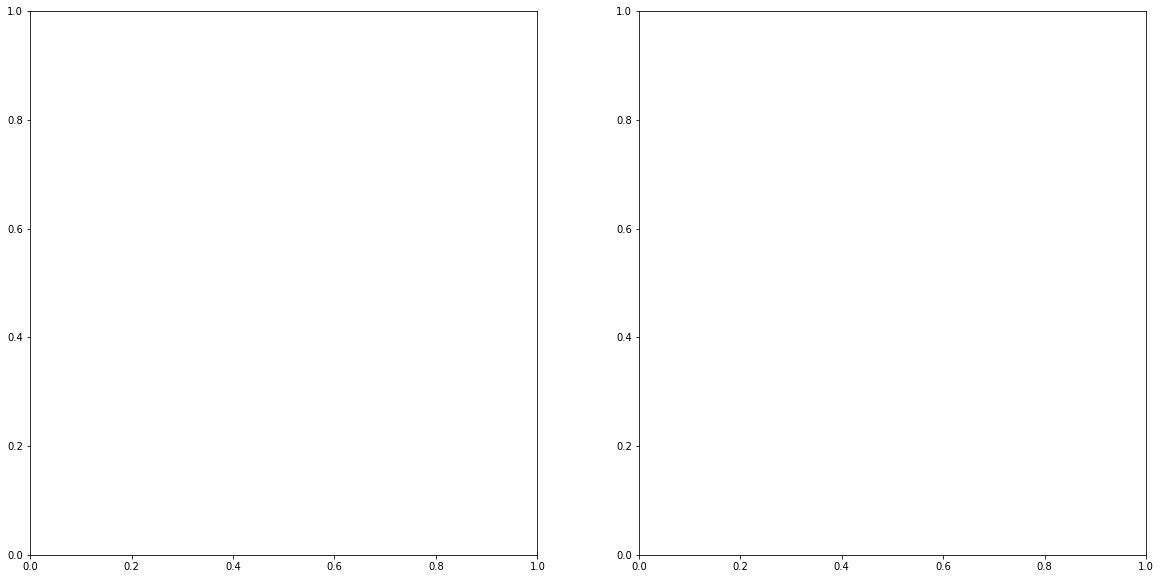

In [35]:
fig, ax = plt.subplots(1,2, figsize=(20,10))
plt.style.use('fivethirtyeight')
ax[0].plot(tweet_groupby['text'])
ax[0].set_title("amount of Elon Musk's tweets a day")
ax[1].plot(tweet_groupby)
ax[1].set_title("amount of Reactions to Elon Musk's per day")
plt.rcParams['axes.labelsize'] = 42
plt.rcParams['xtick.labelsize'] = 42
plt.rcParams['ytick.labelsize'] = 54
plt.rcParams['text.color'] = 'k'
plt.show()

### Checking specific cases

In [ ]:
df_tsla_tweets

On August 7th, 2018, massive tweet storm following [Elon Musk's tweet](https://twitter.com/elonmusk/status/1026872652290379776) announcing his will to make Tesla a private company, once reaching a stock value of $420.
The announcment had major consequence, since the US Securities and Exchange Commission launched an investigation, notably asking for him to stepdown of his CEO position, due to tweeting inacurrate information which may have impact on the stock price.

### Testing out some stuff

In [ ]:
df_musk_tweets_test = df_musk_tweets.copy()

In [ ]:
df_musk_tweets_test.head(10)

In [ ]:
df_musk_tweets_test.dtypes

In [ ]:
df_musk_tweets_test.shape

In [ ]:
df_musk_tweets_test.isnull().sum()

In [ ]:
df_musk_tweets_test.hashtags.nunique()

In [ ]:
df_musk_tweets_test['hashtags'].value_counts()

In [ ]:
df_musk_Tesla_tweets = df_musk_tweets_raw[df_musk_tweets_raw['text'].str.contains(pat="Starman|starman") == True]